In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn import tree

In [2]:
data = pd.read_csv('training_data.csv', header=0)

In [3]:
data.head()

,ID,Amount,Recipient,Sender,Label
0,1856,868.83,541299235,547076231,NOT_FRAUD
1,1857,203.58,248556960,269656618,NOT_FRAUD
2,1858,658.06,541299235,502757091,FRAUD
3,1859,593.10,541299235,549233011,NOT_FRAUD
4,1860,233.86,547076231,549233011,NOT_FRAUD


In [4]:
#colorDic = {'Green': 0, 'Yellow': 1, 'Red': 2}
#fruitDic = {'Mango': 0, 'Grape': 1, 'Lemon': 2}


#data['Color'] = data['Color'].map(colorDic)
#data['Label'] = data['Label'].map(fruitDic)

#fraudDic = {'NOT_FRAUD': 0, 'FRAUD': 1}
#data['Label'] = data['Label'].map(fraudDic)

data.head()

,ID,Amount,Recipient,Sender,Label
0,1856,868.83,541299235,547076231,NOT_FRAUD
1,1857,203.58,248556960,269656618,NOT_FRAUD
2,1858,658.06,541299235,502757091,FRAUD
3,1859,593.10,541299235,549233011,NOT_FRAUD
4,1860,233.86,547076231,549233011,NOT_FRAUD


In [5]:
features = list(data.columns[1:4])
features

['Amount', 'Recipient', 'Sender']

In [6]:
y = data['Label']
x = data[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)

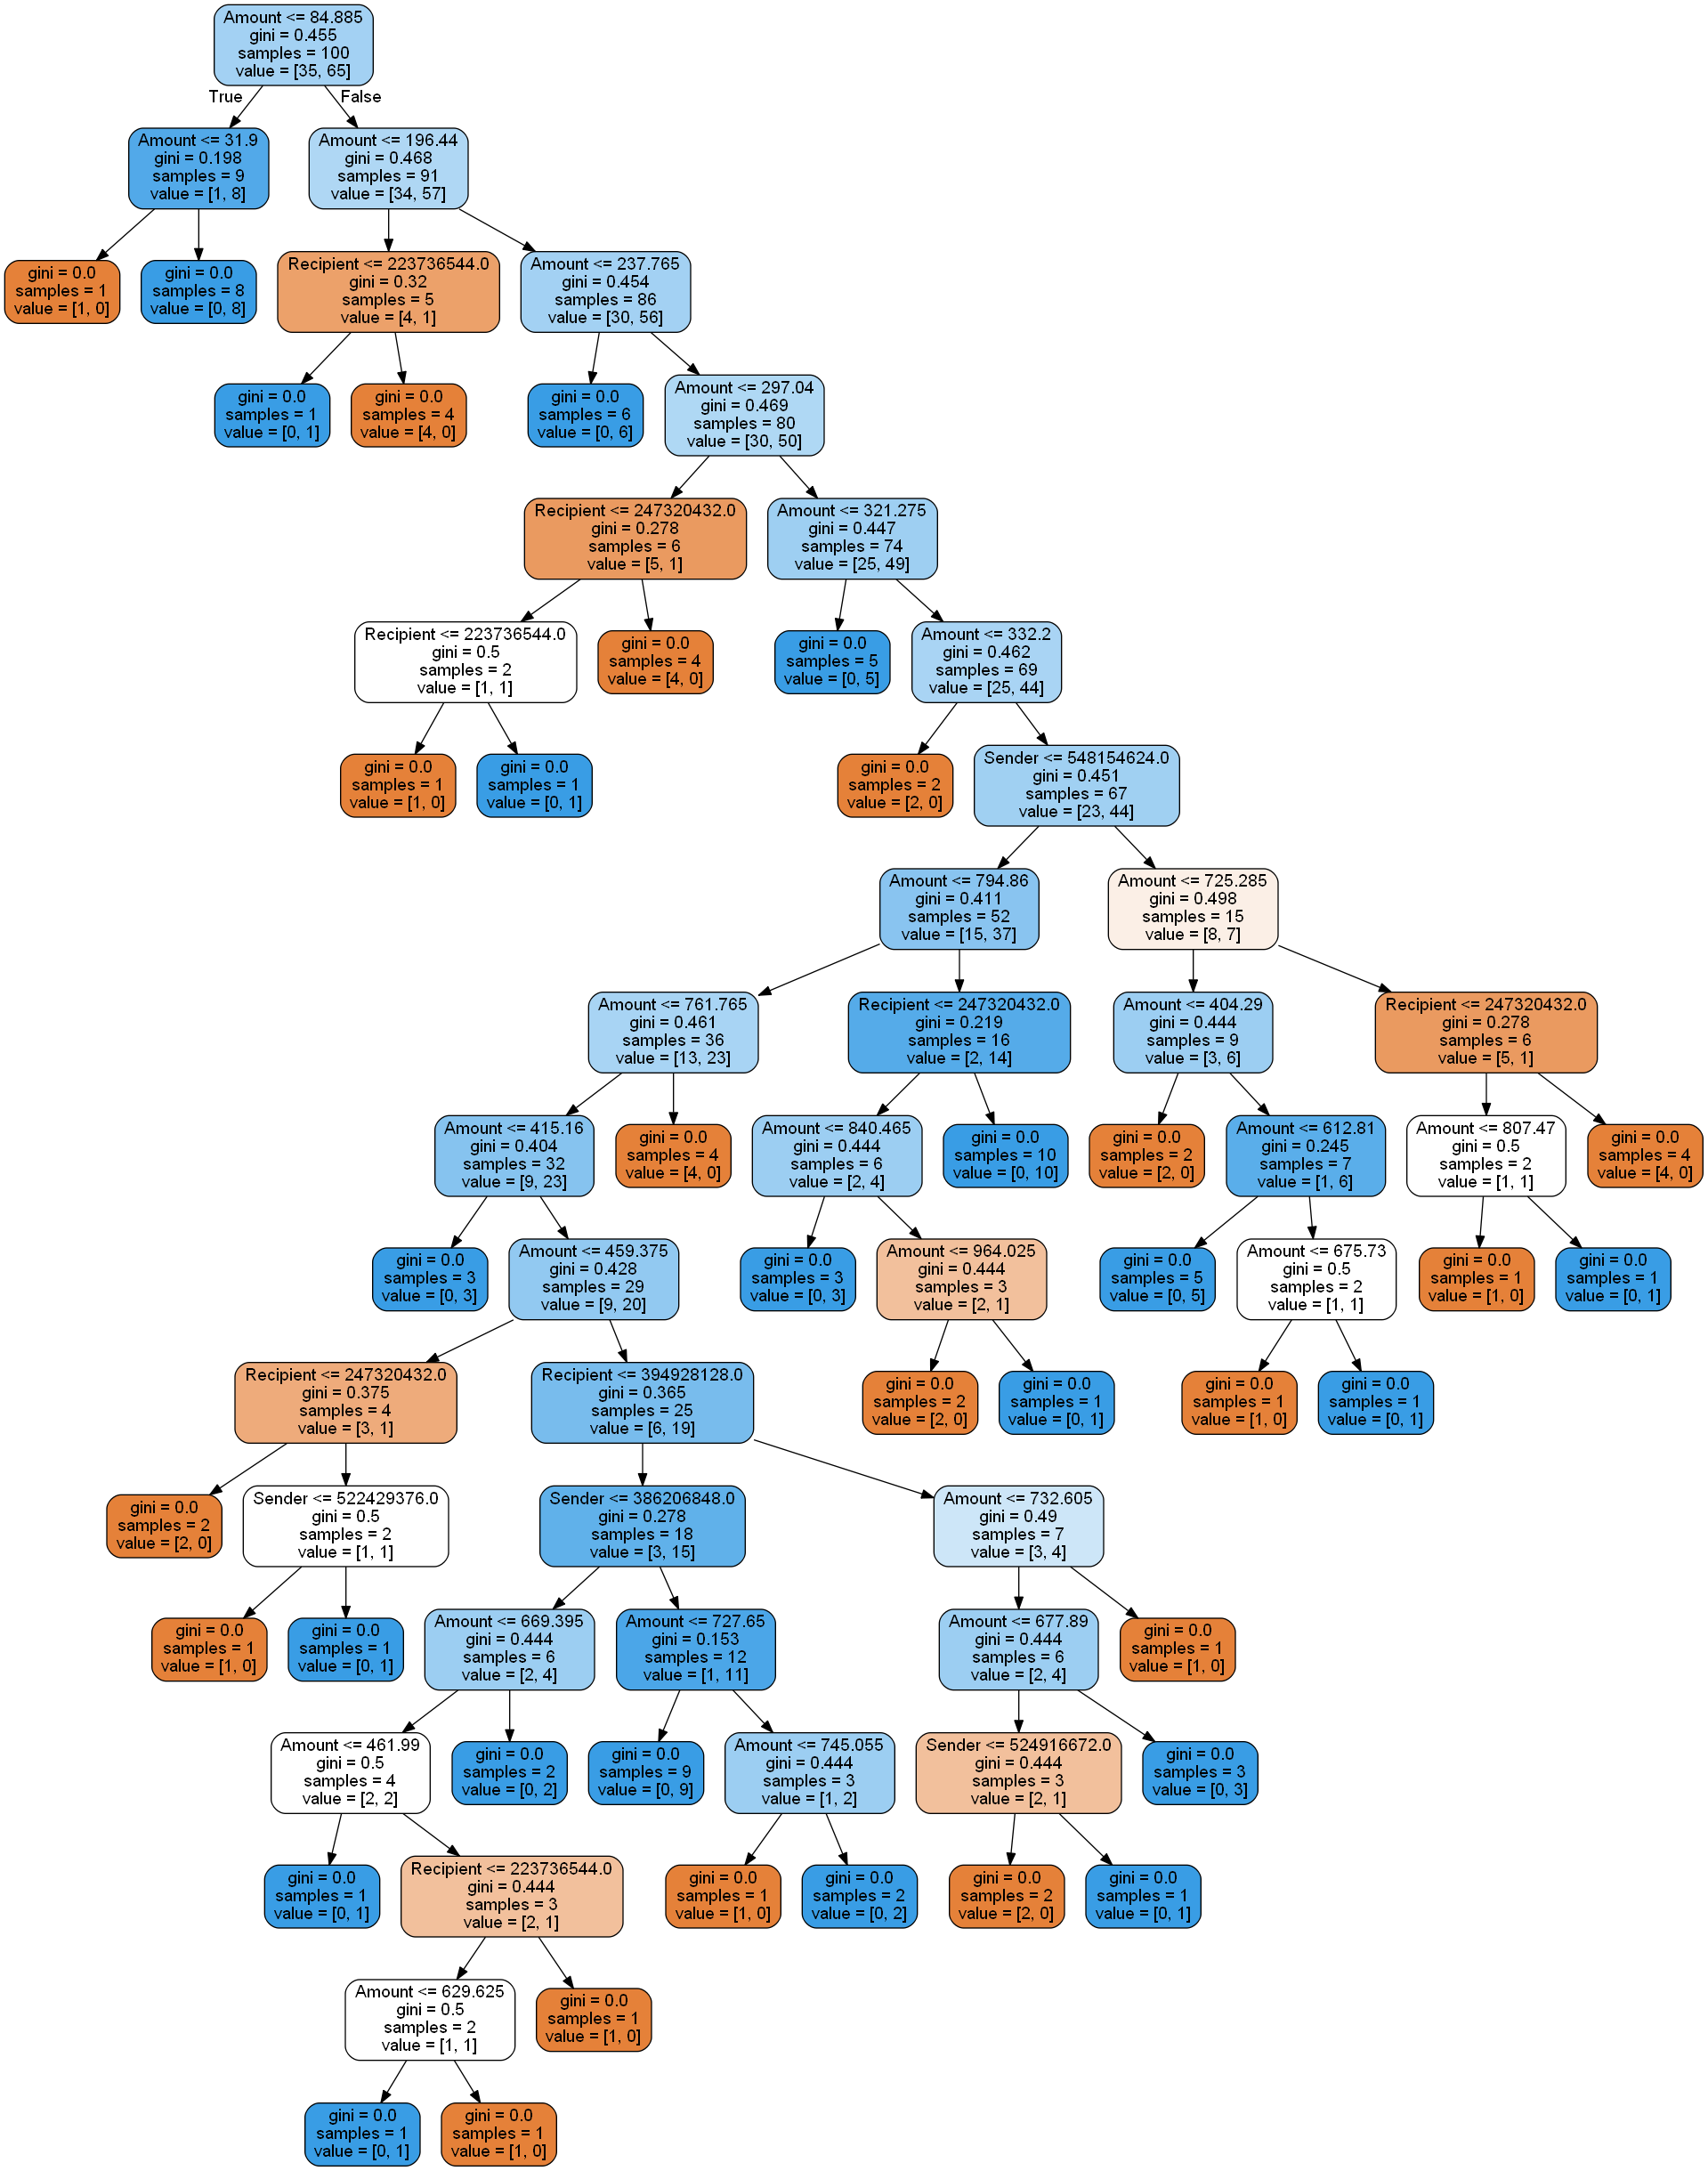

In [7]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data, feature_names=list(features),
                    filled=True, rounded=True,)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [8]:
x = data.values[:, 0:3]
y = data.values[:, 4]

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state = 100)

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state=100,
                                        max_depth=3, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [9]:
y_pred_en = clf_entropy.predict(x_test)
print(y_pred_en)

['NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD' 'NOT_FRAUD'
 'NOT_FRAUD' 'FRAUD']


In [10]:
print("Accuracy is "), accuracy_score(y_test, y_pred_en)*100

Accuracy is 


(None, 85.0)

In [11]:
p = [[658.06, 541299235, 502757091]]
pr =  clf_entropy.predict(p)
print(pr)

['NOT_FRAUD']


In [17]:
import pickle
file = open('model.sav', 'wb')
pickle.dump(clf_entropy, file)

file.close()

In [19]:
model_file = 'model.sav'
model = pickle.load(open(model_file, 'rb'))

In [20]:
pr =  model.predict(p)
print(pr)

['NOT_FRAUD']
